In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath

In [2]:
np.linspace(0,2*np.pi/np.pi*180,10)[:-1]

array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320.])

In [3]:
# regular polygon for testing
npoly = 100
polygon = np.zeros([npoly,2])
print(polygon.shape)
for i,x in enumerate(np.linspace(0,2*np.pi,npoly)):
    polygon[i,0] = 0.6*np.sin(x)
    polygon[i,1] = 0.6*np.cos(x)

(100, 2)


In [4]:
# random set of points to test 
npoints = 100
points = np.random.rand(npoints,2)
points = 2*points - 1.

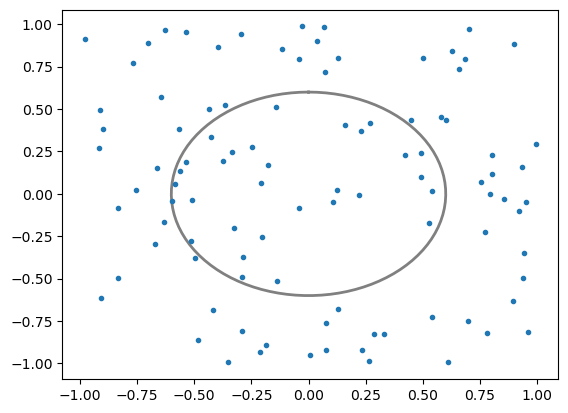

In [5]:
plt.plot(polygon[:,0],polygon[:,1],lw=2,color='gray')
plt.plot(points[:,0],points[:,1],lw=0,marker='o',markersize=3)

In [6]:
# Ray tracing
def ray_tracing_method(x,y,poly):
    """
    points-in-polygon algorithm
    from: ?
    """
    n = len(poly)
    inside = False

    p1x,p1y = poly[0]
    for i in range(n+1):
        p2x,p2y = poly[i % n]
        if y > min(p1y,p2y):
            if y <= max(p1y,p2y):
                if x <= max(p1x,p2x):
                    if p1y != p2y:
                        xints = (y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x,p1y = p2x,p2y

    return inside

In [7]:
inside = np.zeros(points.shape[0],dtype=bool)
for i in range(points.shape[0]):
    inside[i] =ray_tracing_method(points[:,0][i],points[:,1][i],polygon)
print(inside)

[False False False False False False False False  True False False False
 False False False False False False  True False False False False False
  True  True  True  True False  True  True  True  True  True  True  True
  True False  True False  True False False  True False False False False
 False False False  True  True False  True False  True False False False
 False False False  True False  True  True False False False False False
 False False False False False  True False  True False  True False False
 False False  True False  True False False  True False False False False
 False False False False]


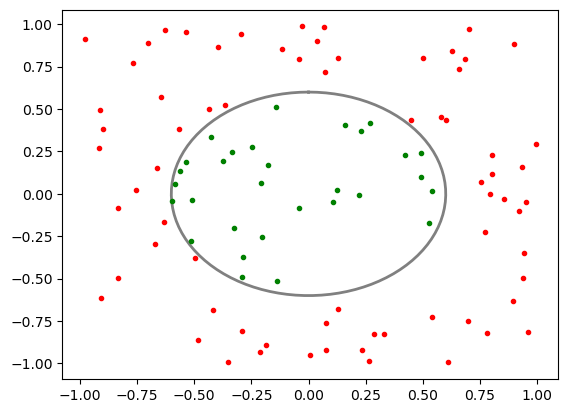

In [8]:
plt.plot(polygon[:,0],polygon[:,1],lw=2,color='gray')
for i in range(points.shape[0]):
    if (inside[i]): plt.plot(points[:,0][i],points[:,1][i],lw=0,marker='o',markersize=3,color='green')
    if (not inside[i]): plt.plot(points[:,0][i],points[:,1][i],lw=0,marker='o',markersize=3,color='red')